# Bibliothèques


In [15]:
import numpy as np
import pandas as pd

In [16]:
import pandas as pd
import numpy as np
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

# Merge
First of all, you have to merge both DataFrames to have a new DataFrame "df2018" DataFrame with 365 rows and 20 columns (indeed, you can drop the date column in double).



In [25]:
# Your code here :
df2018 = pd.merge(df_main, df_opinion, left_on='DATE', right_on='date', how='outer')

df2018 = df2018.drop(columns=['date'])

print(df2018.head())
print(f"Number of rows: {df2018.shape[0]}")
print(f"Number of columns: {df2018.shape[1]}")

         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

# Linear regresssion
There are some missing values in the "Sunhour" column, and you want to fill them.

First, you have to split the DataFrame to have :
- a DF with only rows without NaN, you'll call it "df_clean". This DF should have 341 rows and 20 columns.
- a DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan". This DF should have 24 rows and 20 columns.


In [33]:
# Your code here :
df_clean = df2018.dropna(subset=['SUNHOUR'])

df_nan = df2018[df2018['SUNHOUR'].isna()]

print(df_clean.shape)
print(df_nan.shape)

(341, 20)
(24, 20)


## Now, train your model
For this part, let's work on df_clean.
With scikit-learn, find the multivariate linear regression model with the best score (remember to train-test-split your DataFrame "df_clean" before!).

You are trying to predict `SUNHOUR`, so what's your target `y` ?

Print the R2-score for the test set, and check if you don't have underfitting or overfitting.

In [34]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

# Opinion mapping
opinion_mapping = {'very bad': 0, 'bad': 1, 'not good not bad':2, 'average': 3, 'good': 4, 'very good': 5}
df_clean['OPINION'].replace(opinion_mapping, inplace=True)

X = df_clean.drop(columns=['SUNHOUR', 'DATE'])
y = df_clean['SUNHOUR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Explicitly use .loc to avoid SettingWithCopyWarning
df_clean.loc[X_test.index, 'SUNHOUR'] = y_pred


r2_test = r2_score(y_test, y_pred)

print(f"R2 score for the test set is: {r2_test}")


R2 score for the test set is: 0.7020033653287858


<ipython-input-34-6041311d790d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['OPINION'].replace(opinion_mapping, inplace=True)


## Predictions
Predict the sunhours values for your DF "df_nan", and store result in the `SUNHOUR` column (which is empty, because this is `df_nan`).

In [50]:
# Your code here :

X_nan = df_nan.drop(columns=['SUNHOUR', 'DATE'])


X_nan_imputed = imputer.transform(X_nan)


sunhour_predictions = model.predict(X_nan_imputed)

df_nan.loc[:, 'SUNHOUR'] = sunhour_predictions


<ipython-input-50-9c6fc192c578>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan.loc[:, 'SUNHOUR'] = sunhour_predictions


## Concatenate and scatterplot

Concatenate both DataFrames to a new one "df2018complete", and draw a scatterplot with Date on X-axis and Sunhours on Y-axis.
Try to add a flag to identify real values and predicted values.

You should get something like that. Of course, not exactly the same chart, because we don't train the same model, on the same columns, etc...

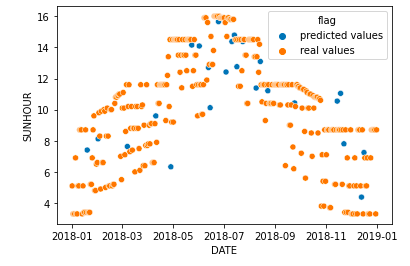

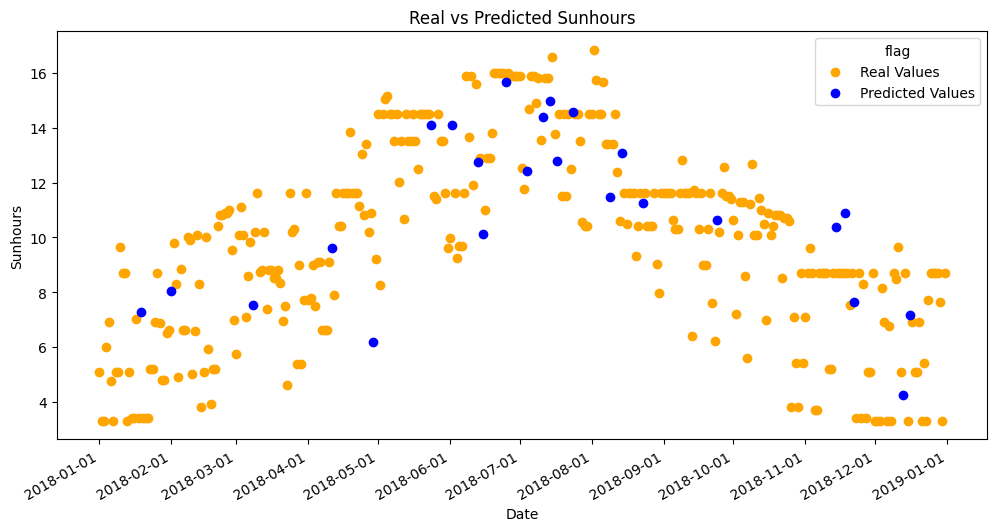

In [62]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Concatenate the DataFrames
df2018complete = pd.concat([df_clean, df_nan])

# Convert 'DATE' to datetime
df2018complete['DATE'] = pd.to_datetime(df2018complete['DATE'], errors='coerce')

# Drop rows with NaT (Not a Time) values, if any
df2018complete = df2018complete.dropna(subset=['DATE'])

# Plot the scatterplot
plt.figure(figsize=(12, 6))

# Plot real values (df_clean)
plt.scatter(mdates.date2num(df_clean['DATE']), df_clean['SUNHOUR'], color='orange', label='Real Values')

# Plot predicted values (df_nan)
plt.scatter(mdates.date2num(df_nan['DATE']), df_nan['SUNHOUR'], color='blue', label='Predicted Values')


plt.xlabel('Date')
plt.ylabel('Sunhours')
plt.title('Real vs Predicted Sunhours')


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate the X-axis labels for better readability
plt.gcf().autofmt_xdate()


legend = plt.legend()
legend.set_title('flag')


plt.show()
